In [2]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib as plt

## I/ Data Importation and Retreatment

In [3]:
data = pd.read_csv("C:\\Users\\boyan\\Documents\\MiE2\\Macroeconometrics and Machine Learning\\PROJET\\MacroML-Project\\PK data - FRED\\FRED_Series\\FRED_Series\\output\\merged_mon_FRED_Pierre.csv")

In [4]:
data

,Unnamed: 0,AUD_FREDmon,AUD_FREDmon.1,AUD_FREDmon.2,AUD_FREDmon.3,AUD_FREDmon.4,AUD_FREDmon.5,AUD_FREDmon.6,AUD_FREDmon.7,AUD_FREDmon.8,...,SEK_FREDuirpmon.14,SEK_FREDuirpmon.15,SEK_FREDuirpmon.16,SEK_FREDuirpmon.17,SEK_FREDuirpmon.18,SEK_FREDuirpmon.19,SEK_FREDuirpmon.20,SEK_FREDuirpmon.21,SEK_FREDuirpmon.22,SEK_FREDuirpmon.23
0,NaN,exchange_rate,no_change_prediction,actual_1m_price_change,12m_price_level_change,6m_price_level_change,actual_1m_money_stock_change,12m_money_stock_change,6m_money_stock_change,money_market_interest_rate,...,USD_12m_price_level_change,USD_6m_price_level_change,USD_actual_1m_money_stock_change,USD_12m_money_stock_change,USD_6m_money_stock_change,USD_money_market_interest_rate,USD_change_in_lagged_money_market_rates,USD_actual_1m_output_change,USD_12m_output_change,USD_6m_output_change
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.412349903,4.406856817,4.33871937,4.403194531,4.408685816,4.404187752,4.427638289,4.420397154,4.463286838,4.474476724
3,1973-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.493153176,4.489550692,4.569974482,4.486267883,4.48290547,4.486610588,4.512294675,4.539970672,4.54279213,4.547007796
4,1973-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.413988998,4.406689147,4.335983775,4.404426437,4.423620713,4.405005759,4.4303261,4.4328,4.464921894,4.461871175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2014-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.807355488,6.797943982,6.954075891,6.757115374,6.761159919,6.818388832,6.81895677,6.81298595,6.84673053,6.854023232
499,2014-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.888743143,6.883467024,6.786714162,6.846200865,6.864253609,6.89778288,6.8983,6.958181076,6.922809186,6.921525666
500,2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.120330986,7.121467322,7.060474936,7.071271309,7.105121218,7.129665496,7.1302,7.1302,7.156381597,7.155044781
501,2014-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.235543419,7.243380486,7.25322668,7.195096915,7.22410902,7.245056845,7.2456,7.339131842,7.271660624,7.269782574


In [5]:
data.describe()

,Unnamed: 0,AUD_FREDmon,AUD_FREDmon.1,AUD_FREDmon.2,AUD_FREDmon.3,AUD_FREDmon.4,AUD_FREDmon.5,AUD_FREDmon.6,AUD_FREDmon.7,AUD_FREDmon.8,...,SEK_FREDuirpmon.14,SEK_FREDuirpmon.15,SEK_FREDuirpmon.16,SEK_FREDuirpmon.17,SEK_FREDuirpmon.18,SEK_FREDuirpmon.19,SEK_FREDuirpmon.20,SEK_FREDuirpmon.21,SEK_FREDuirpmon.22,SEK_FREDuirpmon.23
count,502,474,474,474,474,474,474,474,474,474,...,502,502,501,502,502,502,502,502,502,502
unique,502,456,456,474,474,474,474,474,474,474,...,502,502,501,502,502,502,502,502,502,502
top,2014-11-30,0.7556,0.7556,0.903232683,0.898238309,0.8979567,0.919983003,0.904587011,0.906613516,0.897452332,...,7.407463894,7.424601605,7.25322668,7.361692158,7.382570236,7.414944108,7.4155,7.40919966,7.446793379,7.449645416
freq,1,3,3,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
data = data.apply(pd.to_numeric, errors='coerce')

##### We view that some series are not stationary. If we were doing VAR methods, we would have to first difference / detrend the datas. But  Random Forest is well-suited to handle non-stationary series, as it doesn't account for time dependencies and only view each time point as a cross-sectional datapoints. So we don't retreat the data, as in Stoltz and al. In fact, we only first-difference the exchange rate that we are trying to predict.

##### As for missing values, all of them only correspond to truncations at the beginning or at the end of it (e.g. Deutschemark no longer being used). Therefore, there is no need for replacing NaN will backward fill or mean, we can just dropna.

### Drop Missing Values (just truncations of the series at the beginning or at the end of the time period)

In [7]:
currencies = ['AUD','CAN','CHF','DEM','DNK','FRF','ITL','JPY','PTE','SEK']

In [8]:
currency_dfs = {}

In [9]:
df = pd.DataFrame(data)

In [10]:
for currency in currencies:
    #extraction
    currency_columns = [col for col in df.columns if col.startswith(currency)]
    #subset definition
    currency_dfs[currency] = df[currency_columns]
    #perform operations
    currency_dfs[currency] = currency_dfs[currency].dropna(axis=0)

In [11]:
currency_dfs['AUD']

,AUD_FREDmon,AUD_FREDmon.1,AUD_FREDmon.2,AUD_FREDmon.3,AUD_FREDmon.4,AUD_FREDmon.5,AUD_FREDmon.6,AUD_FREDmon.7,AUD_FREDmon.8,AUD_FREDmon.9,...,AUD_FREDmon.14,AUD_FREDmon.15,AUD_FREDmon.16,AUD_FREDmon.17,AUD_FREDmon.18,AUD_FREDmon.19,AUD_FREDmon.20,AUD_FREDmon.21,AUD_FREDmon.22,AUD_FREDmon.23
21,1.3093,1.3093,1.320491,1.321686,1.322832,1.328576,1.314830,1.311888,1.319801,1.308039,...,1.293417,1.289517,1.294903,1.312970,1.321801,1.300920,1.308428,1.292021,1.307807,1.301184
22,1.3110,1.3110,1.322110,1.323290,1.323439,1.340007,1.316287,1.321094,1.320902,1.310393,...,1.294970,1.291741,1.238477,1.313436,1.313908,1.302649,1.311040,1.293468,1.307992,1.300403
23,1.3172,1.3172,1.322734,1.329960,1.329589,1.301775,1.321822,1.328022,1.326216,1.316274,...,1.300737,1.298705,1.296751,1.318021,1.301956,1.309794,1.318191,1.297214,1.312217,1.304162
24,1.3295,1.3295,1.340626,1.341798,1.340964,1.288445,1.333516,1.336304,1.337152,1.328062,...,1.311832,1.312912,1.274837,1.327296,1.306941,1.321082,1.328552,1.313660,1.321094,1.313157
25,1.3480,1.3480,1.353593,1.359835,1.358537,1.362983,1.351729,1.349504,1.354817,1.347063,...,1.329744,1.331989,1.307376,1.341905,1.312421,1.339176,1.347709,1.334268,1.337568,1.330172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.9303,0.9303,0.927701,0.931245,0.931314,0.954309,0.936820,0.934250,0.930362,0.930300,...,0.928562,0.927640,0.931390,0.924702,0.920248,0.928388,0.930338,0.931166,0.931273,0.932952
489,0.9519,0.9519,0.950122,0.952644,0.952643,0.947618,0.958654,0.957127,0.951971,0.951908,...,0.949887,0.948992,0.936146,0.945355,0.942703,0.949943,0.951900,0.956679,0.953195,0.954672
490,0.9324,0.9324,0.932400,0.933351,0.932545,0.967888,0.938657,0.938276,0.932462,0.932392,...,0.930309,0.929529,0.899331,0.924850,0.923027,0.930483,0.932400,0.938955,0.934073,0.935601
491,0.8980,0.8980,0.901360,0.899129,0.897720,0.892236,0.903924,0.909019,0.898067,0.898007,...,0.895899,0.895352,0.916653,0.891087,0.887757,0.896154,0.898000,0.910704,0.900165,0.901710


## II/ Random Forest Regressor

In [12]:
#1st step : create lag (just 1 step ) for all fundamentals + first differentiate the target (to be predicted) : st-st-1 -- 
#2nd step : create train test split on time series 
#3rd step : train random forest regressor on each currency on the training sample using time series CV and hyperparameter tuning
#4th step : predict using the best model for each currency on the validation sample, compute the mae, compare it to the no-change mae to get Theil ratio
#5th step : use permutation method to evaluate feature importance 


In [13]:
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### A/ Random Forest (FD data on non-FD data)

In [14]:
MAE_RF_dict = {}
No_change_forecast = {}

#### Prepration for Grid Search

The key point is that the best combination of hyperparameters found using neg_mean_absolute_error will likely result in the lowest Theil ratio when you compute it afterward, because both metrics are related: a model that performs better on neg_mean_absolute_error will typically also perform better on the Theil ratio.

#### The Loop

For each currency, the loop performs hyperparameter tuning using time_series compatible cross validation for the number of trees, tree depth and the number of random features used to create each Tree. The training data feeded to grid_search corresponds to the first 2/3. Grid_search then returns the best model for each currency that we then use to predict the remaining 1/3 of the time series. 

In [15]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

# TimeSeriesSplit for cross-validation (5 splits)
tscv = TimeSeriesSplit(n_splits=5)

# Store the best parameters for each currency and their Theil ratio
currency_best_params = {}
currency_theils = {}
currency_feature_importance = {}


# Iterate over all currencies and perform grid search
for currency, df_currency in currency_dfs.items():
    target_column = df_currency.columns[0]
    memo_column = df_currency.columns[1]
    feature_columns = df_currency.columns[2:]

    # First difference the exchange rate series (target)
    ## The FD series is well aligned with the lags - so no future data leakage from here
    df_currency[target_column] = df_currency[target_column].diff()
    for col in feature_columns:
        for lag in range(1, 7):
            df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)

    # Drop missing values after creating lags
    df_currency = df_currency.dropna()

    # Define X and y (one feature set per currency! no mix-up)
    X = df_currency.drop(columns=[target_column, memo_column])
    y = df_currency[target_column]

    # définition train-test-split before feeding to grid_search for tuning
    n = len(y)
    train_size = int(np.floor(2/3 * n))
    X_train = X.iloc[:train_size]
    y_train = y.iloc[:train_size]
    X_val = X.iloc[train_size:]
    y_val = y.iloc[train_size:]
    #drop NaN in a consistent way
    train_data = X_train.join(y_train).dropna()
    X_train = train_data.drop(columns = [target_column])
    y_train = train_data[target_column]

    val_data = X_val.join(y_val).dropna()
    X_val = val_data.drop(columns = [target_column])
    y_val = val_data[target_column]


    # Initialize grid search for this currency
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=1),
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_absolute_error',  # Minimize MAE
        n_jobs=-1,
        verbose=1
    )

    # Perform grid search for the current currency
    grid_search.fit(X_train, y_train)

    # Get the best parameters for this currency
    best_params_for_currency = grid_search.best_params_
    currency_best_params[currency] = best_params_for_currency

    # Get the best model after grid search and evaluate on the entire dataset
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)

    # Calculate MAE and No-change forecast MAE for the current currency
    mae_model = mean_absolute_error(y_val, y_pred)
    no_change = y_val.abs().mean()

    # Calculate the Theil ratio for this currency
    theil_ratio = mae_model / no_change
    currency_theils[currency] = theil_ratio

    # supplementary step for permutation
    perm_importance = permutation_importance(best_model, X_val, y_val, n_repeats=10, random_state = 42, n_jobs = -1)
    currency_feature_importance[currency] = perm_importance.importances_mean


# Output the best parameters per currency
print("Best parameters per currency:")
for currency, best_params in currency_best_params.items():
    print(f"{currency}: {best_params}")

# Print Theil ratios for each currency
print("\nTheil Ratios per Currency:")
for currency, theil in currency_theils.items():
    print(f"{currency}: {theil}")

# Print feature importances per currency
print("\nFeature Importances (Permutation Importance) per Currency:")
for currency, importance in currency_feature_importance.items():
    print(f"{currency}: {importance}")


C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_currency[f'{col}_lag{lag}'] = df_currency[col].shift(lag)
C:\Users\boyan\AppData\Local\Temp\ipykernel_18160\2546543823.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\boyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters per currency:
AUD: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
CAN: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
CHF: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}
DEM: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 250}
DNK: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
FRF: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
ITL: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
JPY: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
PTE: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 250}
SEK: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}

Theil Ratios per Currency:
AUD: 0.8810273489814617
CAN: 0.8490418621179817
CHF: 0.811925622989258
DEM: 0.9202105948603952
DNK: 0.7277198999763453
FRF: 0.7839264605314581
ITL: 0.851676148281166
JPY: 0.9351089386467653
PTE: 0.7833928153800037
SEK: 0.797802453485047

Feature Importan

In [16]:
#average Theil
values = currency_theils.values()
average_theil = sum(values)/len(values)
average_theil

np.float64(0.8341832145249883)

### B/ Feature importance evaluation using permutation

In [17]:
# Print feature importances per currency
print("\nFeature Importances (Permutation Importance) per Currency:")
for currency, importance in currency_feature_importance.items():
    print(f"{currency}: {importance}")


Feature Importances (Permutation Importance) per Currency:
AUD: [ 2.36955966e-02  3.14535444e-02  2.80295532e-02  1.71459577e-02
  2.74879423e-02  2.37957518e-02  2.68980100e-02  2.52321516e-02
  2.14295304e-02  3.05183936e-02  2.60655231e-02  3.35987001e-02
  2.55087755e-02  2.89062332e-02  3.10538731e-02  3.47573598e-02
  3.35524433e-02  2.58838738e-02  2.47423852e-02  2.54103964e-02
  2.53563807e-02  2.65392146e-02 -6.83146926e-04 -7.99639005e-04
  1.30994423e-03  2.64720163e-03  3.11515167e-03  4.06377526e-03
  2.21540745e-03 -1.21768618e-03  6.25375612e-04  2.88925678e-03
  1.34576738e-04 -5.28432383e-04  6.73317205e-04  7.60150806e-04
  1.18215515e-04  2.37504204e-03  4.94594762e-03  5.88501694e-04
 -3.70593837e-03  6.42290969e-03  2.20009386e-03  2.27153008e-03
  1.56311912e-03 -3.47666813e-04  1.32568037e-03  1.56442417e-04
  1.12645261e-04  2.16448364e-03 -5.09318686e-04  6.66733454e-04
 -5.20879439e-05 -1.96406609e-03 -2.93450695e-03  2.62625668e-03
  8.21002134e-03 -1.01808

Positive values (e.g., 3.05183936e-02, 2.60655231e-02) mean that the feature is somewhat important, and its permuted version significantly impacts the model’s performance.
Negative values (e.g., -6.83146926e-04) indicate that permuting this feature didn’t impact the model’s performance much, so the feature might be less important.
The magnitude of the value indicates the degree of importance. 
In below code we aggregate the lags of the same feature and then we average the importance of each feature across currencies.

In [18]:
# Number of lag features per original feature (6 lags)
num_lags = 6

# Number of original features
original_feature_count = 22

# Create an empty dictionary to store the aggregated feature importances
aggregated_feature_importance = {}

# Iterate over each currency and process the importance scores
for currency, importance_scores in currency_feature_importance.items():
    # Create an array to store the aggregated importance for each of the original 22 features
    aggregated_importance = np.zeros(original_feature_count)
    
    # Aggregate the importance scores for each of the original features
    for i in range(original_feature_count):
        # Get the indices of the lag features for the current original feature
        lag_indices = list(range(i * num_lags, (i + 1) * num_lags))
        
        # Sum (or average) the importance scores of the 6 lag features corresponding to the original feature
        aggregated_importance[i] = np.sum(np.abs(importance_scores[lag_indices]))  # You can change this to np.mean if desired
    
    # Store the aggregated importance for this currency
    aggregated_feature_importance[currency] = aggregated_importance

# Convert the aggregated importance into a DataFrame
aggregated_df = pd.DataFrame(aggregated_feature_importance)

# Label the rows with the original feature names
aggregated_df.index = [f'feature_{i+1}' for i in range(original_feature_count)]

# Calculate the average importance for each feature across all currencies
aggregated_df['average_importance'] = aggregated_df.mean(axis=1)

# Sort the DataFrame by average importance (from highest to lowest)
aggregated_df_sorted = aggregated_df.sort_values(by='average_importance', ascending=False)

# Display the sorted DataFrame with average importance
print(aggregated_df_sorted)

                 AUD       CAN       CHF       DEM       DNK       FRF  \
feature_2   0.163742  0.091488  0.063199  0.009911  0.116653  0.138653   
feature_1   0.151608  0.096601  0.054724  0.014528  0.092374  0.112196   
feature_3   0.179663  0.079358  0.053221  0.015509  0.106729  0.083297   
feature_4   0.103531  0.070423  0.042423  0.007005  0.069103  0.075836   
feature_13  0.007324  0.006172  0.017584  0.026142  0.027451  0.014448   
feature_8   0.007865  0.009591  0.018935  0.009647  0.038993  0.030487   
feature_14  0.014781  0.005921  0.016792  0.014958  0.030800  0.012849   
feature_7   0.018157  0.006916  0.013062  0.003632  0.029115  0.011110   
feature_19  0.010995  0.009366  0.019578  0.008737  0.027688  0.029959   
feature_15  0.006666  0.006753  0.021287  0.015609  0.034029  0.009452   
feature_5   0.014569  0.006013  0.015593  0.009616  0.022175  0.008335   
feature_22  0.010471  0.004990  0.020890  0.010637  0.030928  0.020849   
feature_10  0.017969  0.008260  0.0192

In [19]:
real_names = [
    "H 1m price lvl ch.", 
    "H 12 month price lvl ch.", 
    "H 6 month price lvl ch.", 
    "H 1 month money stock change", 
    "H 12 month money stock change", 
    "H 6 month money stock change", 
    "H money market interest rate", 
    "H change in the lagged MM IR", 
    "H 1 month output lvl ch.", 
    "H 12 month output lvl ch.", 
    "H 6 month output lvl ch.", 
    "US 1m price lvl ch.", 
    "US 12 month price lvl ch.", 
    "US 6 month price lvl ch.", 
    "US 1 month money stock change", 
    "US 12 month money stock change", 
    "US 6 month money stock change", 
    "US money market interest rate", 
    "US change in the lagged MM IR", 
    "US 1 month output lvl ch.", 
    "US 12 month output lvl ch.", 
    "US 6 month output lvl ch."
]


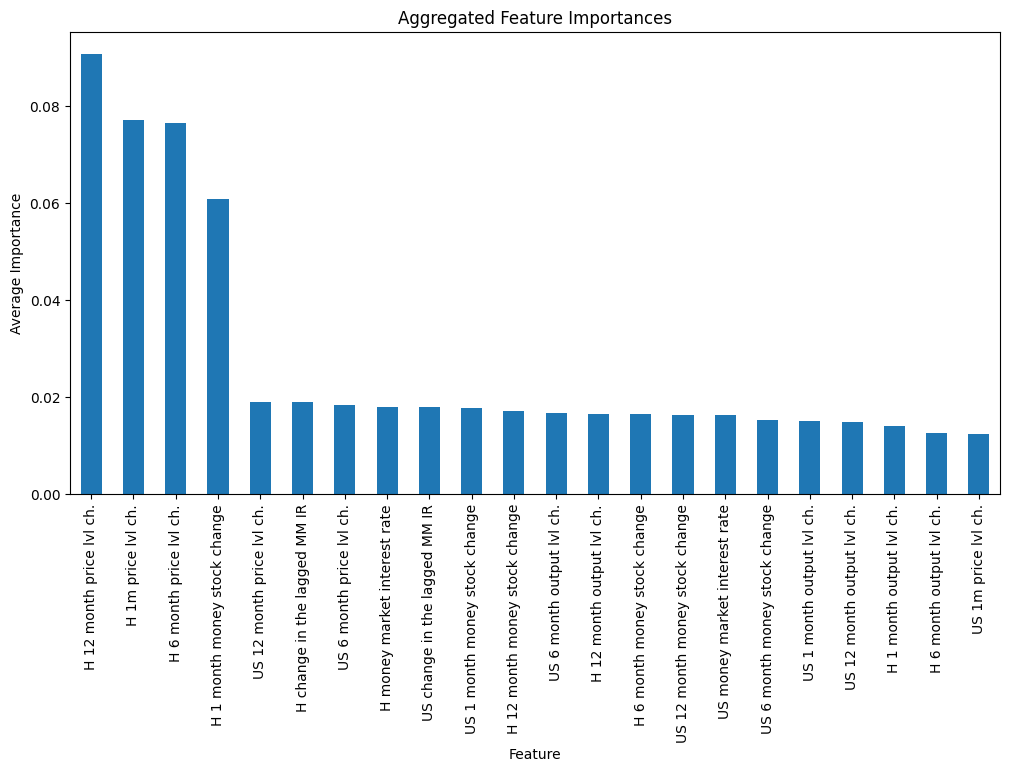

In [20]:
# Assuming real_names contains the real names for the features
# Example: real_names = ['price', 'interest rate', 'GDP', ...]

# Create a mapping from the feature index (like 'feature_1', 'feature_2', ...) to the real names
real_feature_names = [real_names[i] for i in range(len(real_names))]

# Create a new list of real names to match the sorted features
sorted_real_names = [real_feature_names[int(feature.split('_')[1]) - 1] for feature in aggregated_df_sorted.index]

# Optionally, plot the aggregated importance of each feature
import matplotlib.pyplot as plt

# Plotting the average feature importance across all currencies
aggregated_df_sorted['average_importance'].plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('Aggregated Feature Importances')
plt.ylabel('Average Importance')
plt.xlabel('Feature')

# Assign the real feature names to the x-axis
plt.xticks(ticks=range(len(sorted_real_names)), labels=sorted_real_names, rotation=90)

# Show the plot
plt.show()
